In [51]:
import pandas as pd
import scipy
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

Today I will be using the famous handwriting mail data to read handwriting numbers

In [52]:
train= pd.read_csv("file:///Users/moirafacer/Desktop/train.csv")

In [53]:
from sklearn.datasets import fetch_openml


In [54]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True )

# PCA

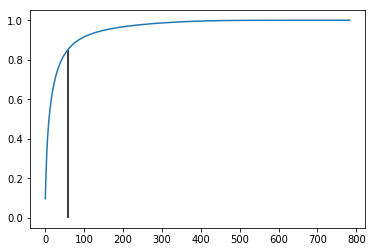

In [55]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[58],x=58);



The above graph shows that using about 75 components will explain around 85% of the data, however I think we can explain more of the data if we use a few more components. 

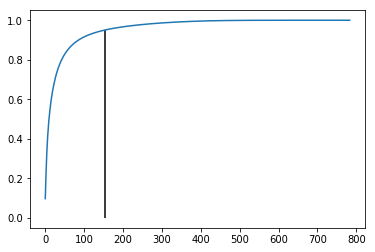

In [56]:


cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[154],x=154);



1 A: I'll be using 154 components, because they explain 95% of the data, instead of 85%. 
Next I will be plotting the first two components, and seeing what they explain.

In [57]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [58]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

<Figure size 432x288 with 0 Axes>

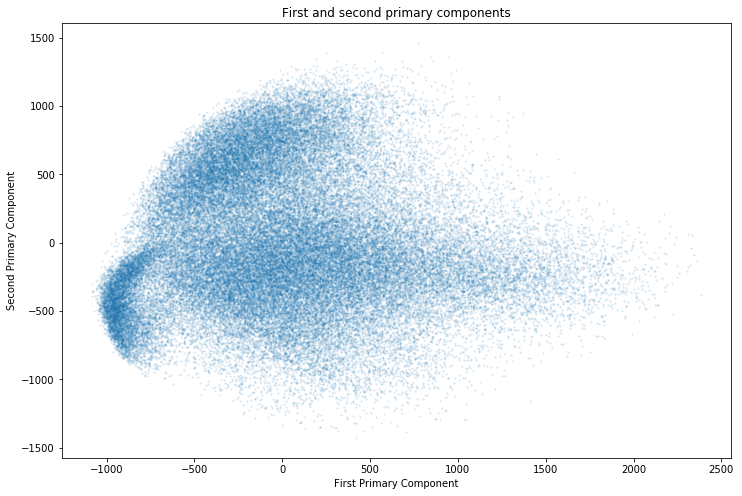

In [59]:
fig = plt.figure()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
x = X_2dim[:,0]
y = X_2dim[:,1]
points = X_2dim[:,2:4]
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, s=2, alpha=.1)
plt.xlabel('First Primary Component')
plt.ylabel('Second Primary Component')
plt.title('First and second primary components')
plt.show();

1 B: There aren't any really clear easy to see trends 

1 C: PCA reduces the dimensionatlity, however we lose a ton of (if not all) interpretability of our results when using PCA

# Plotting the Digits

credit for this code goes to github user hanselringger

In [60]:
def pcaplotter(components1, components2, imagenumber):
    fig = plt.figure(figsize=(15,8))

In [61]:
def pcaplotter(components1, components2, imagenumber):
    fig = plt.figure(figsize=(15,8))

    #original image
    plt.subplot(1, 3, 1);
    plt.imshow(X[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('All components', fontsize=11)
    plt.title('100 Percent', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 2);
    pca = PCA(n_components=components1)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components1, fontsize=11)
    plt.title('95 Percent of info', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 3);
    pca = PCA(n_components=components2)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components2, fontsize=11)
    plt.title('Very reduced quality', fontsize = 13);

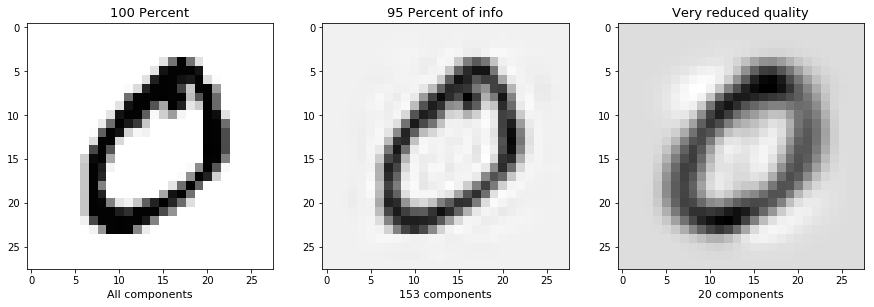

In [62]:
pcaplotter(153, 20, 1)

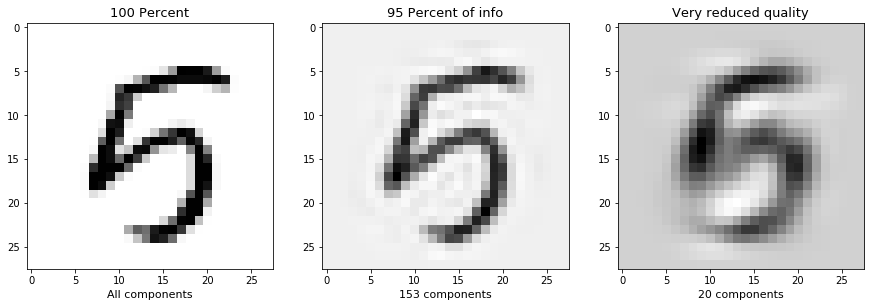

In [63]:
pcaplotter(153, 20, 27000)

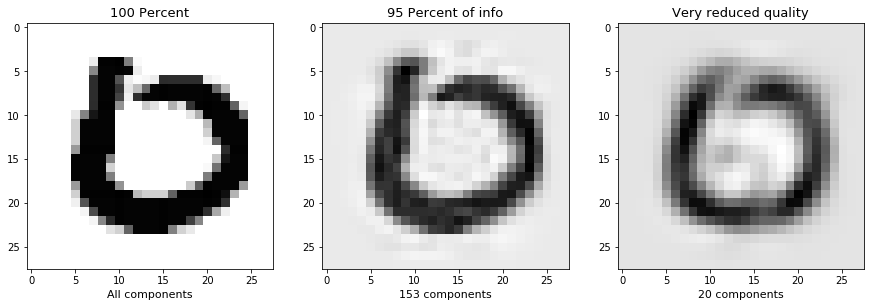

In [64]:
pcaplotter(153, 20, 57000)

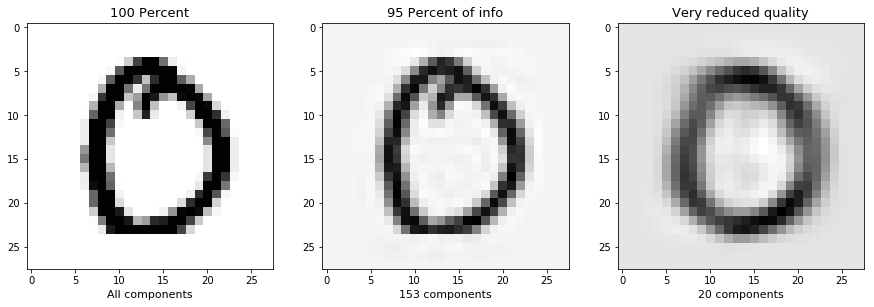

In [150]:
pcaplotter(153, 20, 88)

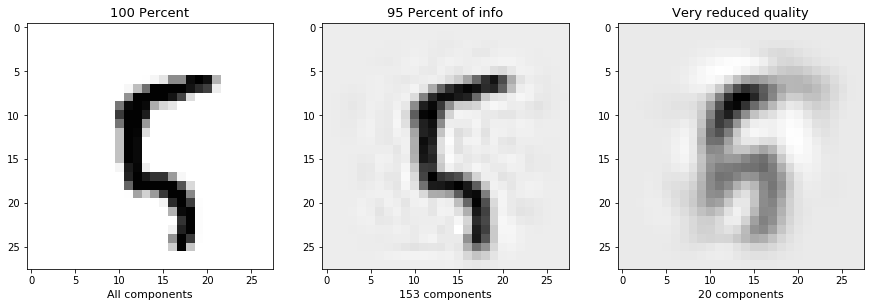

In [151]:
pcaplotter(153, 20, 100)

# 2 Using T-SNE

In [73]:
def tsnereducer1(perp1, lrate, iterations):
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X)

    rows = np.arange(70000)
    np.random.shuffle(rows)
    n_select = 10000

In [77]:
from sklearn.manifold import TSNE

In [82]:
rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.021s...
[t-SNE] Computed neighbors for 1000 samples in 1.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 483.046662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.017944
[t-SNE] KL divergence after 1000 iterations: 0.998414


In [83]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5, 1.0, 'T-SNE')

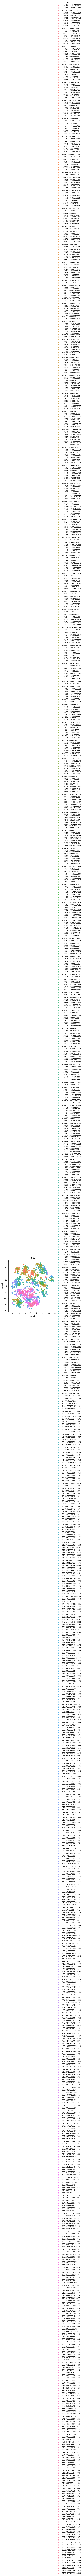

In [84]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

I don't know why, but you might have to scroll through a bunch of stuff to find my TSNE graph above (sorry). However, this graph differs alot from my PCA graph, because here they are starting to cluster (or be classified) by their attributes 

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.013s...
[t-SNE] Computed neighbors for 1000 samples in 1.225s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 307.824067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.033073
[t-SNE] KL divergence after 1000 iterations: 0.901037


Text(0.5, 1.0, 'T-SNE (Perplexity 5)')

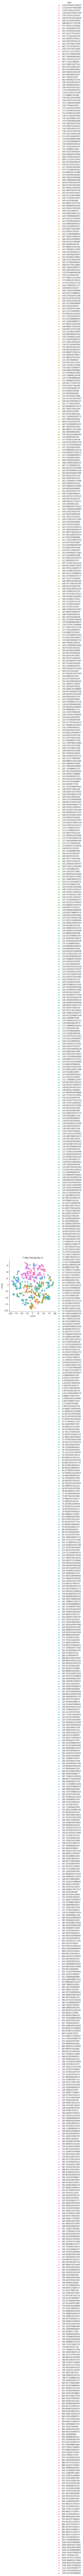

In [88]:
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (Perplexity 5)')

Oof. It did not hold up super well to changes in perplexity. Not horrible, but definitely not great

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.017s...
[t-SNE] Computed neighbors for 1000 samples in 1.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 483.046662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.858147
[t-SNE] KL divergence after 300 iterations: 1.213943


Text(0.5, 1.0, 'T-SNE (200 Iterations)')

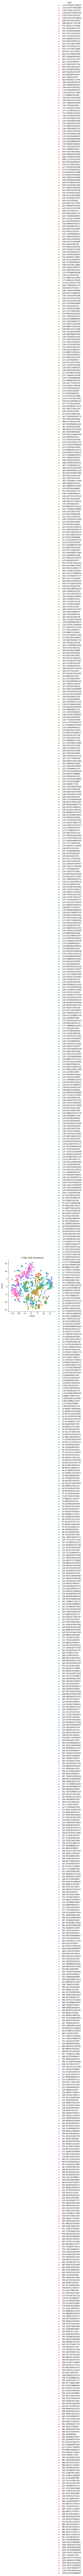

In [87]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (200 Iterations)')

2 B: My clustering wasn't superb to begin with, but that being said it remained fairly similar after changing number of iterations and learning rate.

# 3: K Means Clustering

3A: K is the number of things we want to identify, the integers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, so k will be 10.

In [101]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels, metric='euclidean')


0.058693220344817824

3B I used the silhouette score, because it shows pretty how far away a point is from its designated cluster. The score goes from -1 to 1, I got .05869, which is not super great. 

Using Tsne to cluster them 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.014s...
[t-SNE] Computed neighbors for 1000 samples in 1.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 467.281115
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.617752
[t-SNE] KL divergence after 1000 iterations: 0.953165


Text(0.5, 1.0, 'K-Means Clustering')

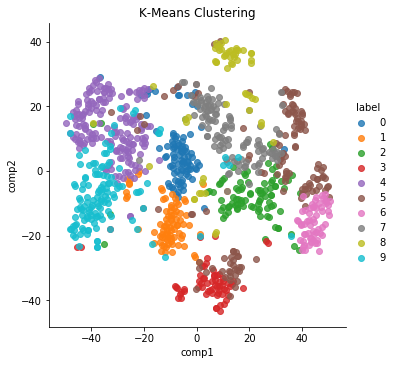

In [136]:


tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')



I did not scale my data, because we talked in class about how scaling data is not necessary for K means, because it uses euclidean distance.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.018s...
[t-SNE] Computed neighbors for 1000 samples in 1.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 483.046662
[t-SNE] KL divergence after 100 iterations with early exaggeration: 64.709846
[t-SNE] KL divergence after 1000 iterations: 0.901662


Text(0.5, 1.0, 'K-Means Clustering')

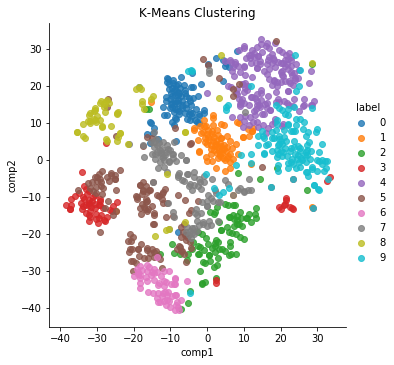

In [140]:

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')


[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 1.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 491.393777
[t-SNE] KL divergence after 100 iterations with early exaggeration: 60.825878
[t-SNE] KL divergence after 1000 iterations: 0.876193


Text(0.5, 1.0, 'K-Means Clustering')

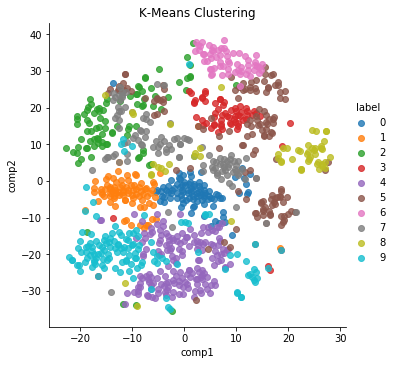

In [141]:

tsne = TSNE(n_components=2, verbose=1, perplexity=70, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 626.912000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 48.580811
[t-SNE] KL divergence after 1000 iterations: 0.696669


Text(0.5, 1.0, 'K-Means Clustering')

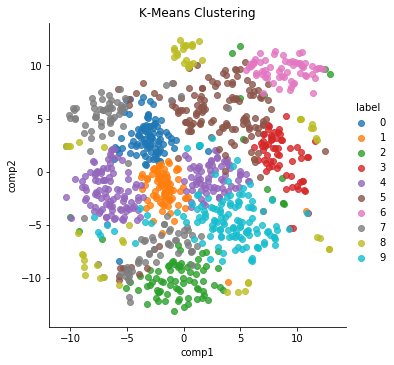

In [142]:

tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

It is fairly robust

 # 4 Hierarchical Clustering

Text(0.5, 1.0, 'Original Dendogram')

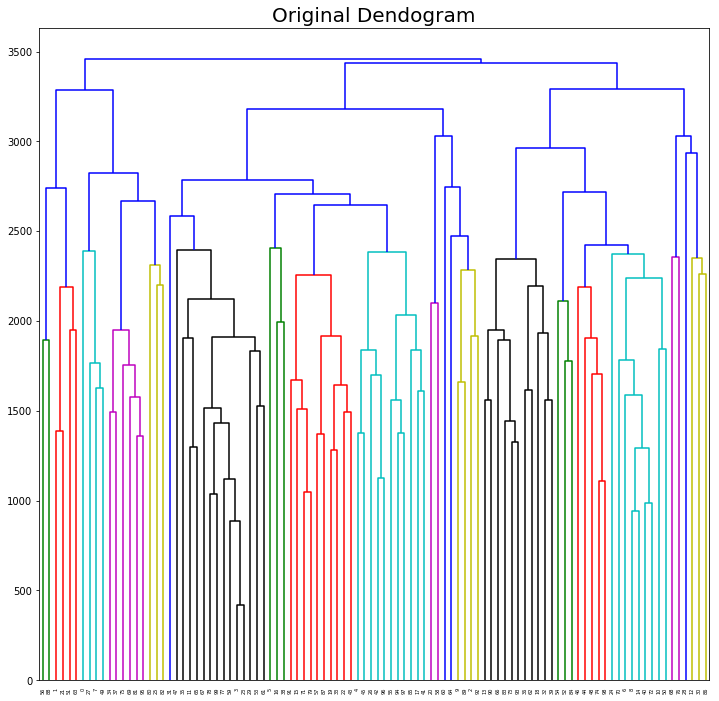

In [144]:
x_set = X[:100]

Z = linkage(x_set, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Original Dendogram', fontsize = 20)

4 B: I think around 10-15 links seem reasonable, there are 14 of the larger dark blue links

Text(0.5, 1.0, 'Average linkage Dendogram')

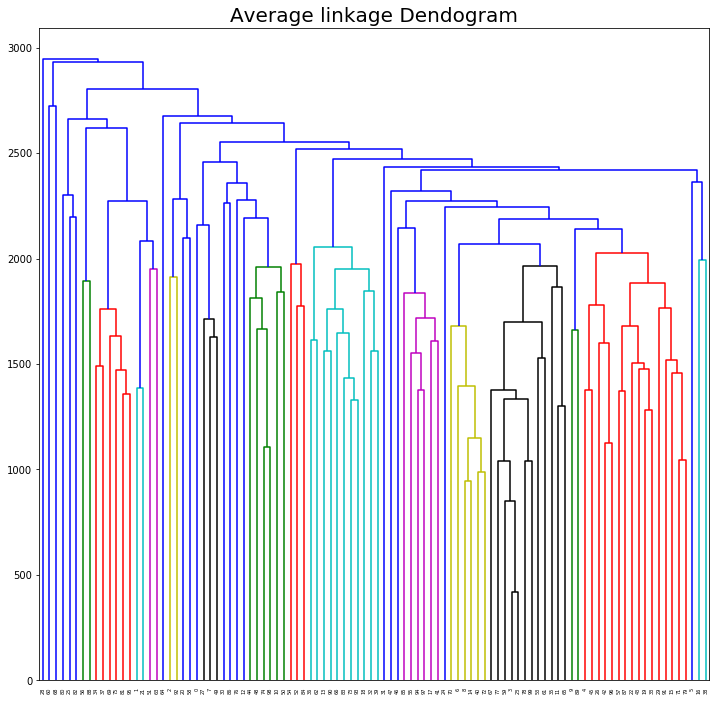

In [148]:
x_set = X[:100]

Z = linkage(x_set, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Average linkage Dendogram', fontsize = 20)

Text(0.5, 1.0, 'Ward linkage Dendogram')

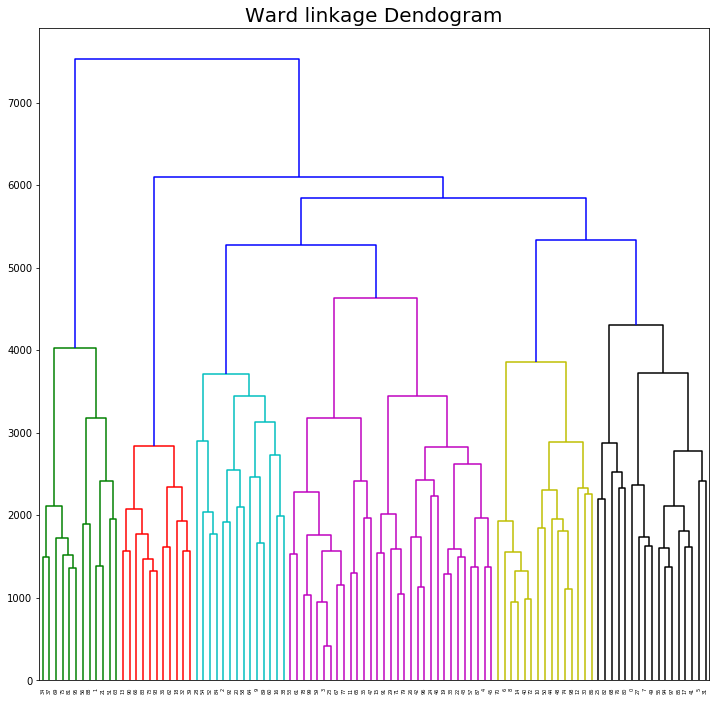

In [149]:

Z = linkage(x_set, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Ward linkage Dendogram', fontsize = 20)

4D: Different Linkage methods cause different things to link with each other, resulting in a different number of links and different link pairs